In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay, roc_curve, confusion_matrix, classification_report, mean_squared_error, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from datetime import timedelta
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV #GridSearch is for hyperparameter tuning
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.impute import KNNImputer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.ensemble import RandomForestClassifier

In [82]:
data = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/Fraud_Detection_Dataset.csv')
data.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date and Time,Merchant Category,Location,Previous Transaction Amount,Time Since Last Transaction,Device Type,Fraud
0,1,4174,659.297095,2023-01-01 00:00:00,Clothing,Los Angeles,579.323704,481.377516,desktop,No
1,2,4507,474.046452,2023-01-01 00:01:00,Dining,Houston,407.220271,1159.211075,desktop,No
2,3,1860,498.819570,2023-01-01 00:02:00,Dining,San Francisco,265.583605,720.677284,desktop,No
3,4,2294,744.199592,2023-01-01 00:03:00,Electronics,Los Angeles,1097.259081,1.000000,mobile,No
4,5,2130,279.181247,2023-01-01 00:04:00,Electronics,Los Angeles,238.389682,1378.958721,mobile,No


# Cleaning and EDA

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction ID               10000 non-null  int64  
 1   Customer ID                  10000 non-null  int64  
 2   Transaction Amount           10000 non-null  float64
 3   Transaction Date and Time    10000 non-null  object 
 4   Merchant Category            10000 non-null  object 
 5   Location                     10000 non-null  object 
 6   Previous Transaction Amount  10000 non-null  float64
 7   Time Since Last Transaction  10000 non-null  float64
 8   Device Type                  10000 non-null  object 
 9   Fraud                        10000 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 781.4+ KB


In [84]:
# Checking for more nulls
data.isnull().sum()

Transaction ID                 0
Customer ID                    0
Transaction Amount             0
Transaction Date and Time      0
Merchant Category              0
Location                       0
Previous Transaction Amount    0
Time Since Last Transaction    0
Device Type                    0
Fraud                          0
dtype: int64

In [85]:
data.describe()

,Transaction ID,Customer ID,Transaction Amount,Previous Transaction Amount,Time Since Last Transaction
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,3010.561100,559.865608,461.410984,677.040726
std,2886.89568,1152.371939,399.984400,334.582413,432.386769
min,1.00000,1000.000000,1.000000,0.000000,1.000000
25%,2500.75000,2001.750000,262.969956,181.109688,295.523894
50%,5000.50000,3004.000000,522.370941,404.367010,653.143168
75%,7500.25000,4010.000000,788.415931,676.079655,1048.479972
max,10000.00000,4999.000000,2953.394492,1500.000000,1694.715674


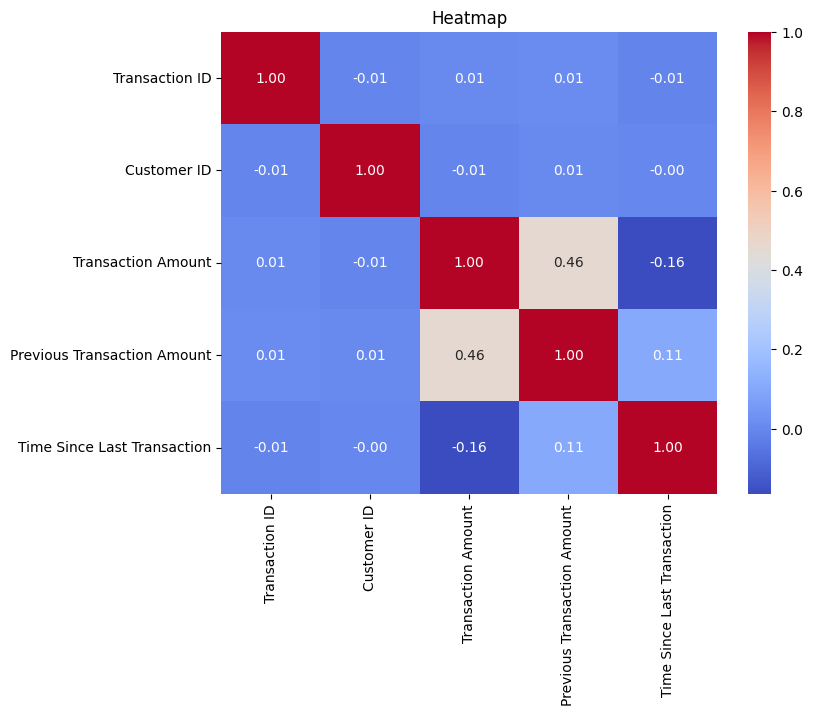

In [86]:
# Select only the numerical columns for correlation analysis
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Generate the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap")
plt.show()

<Axes: xlabel='Fraud', ylabel='Transaction ID'>

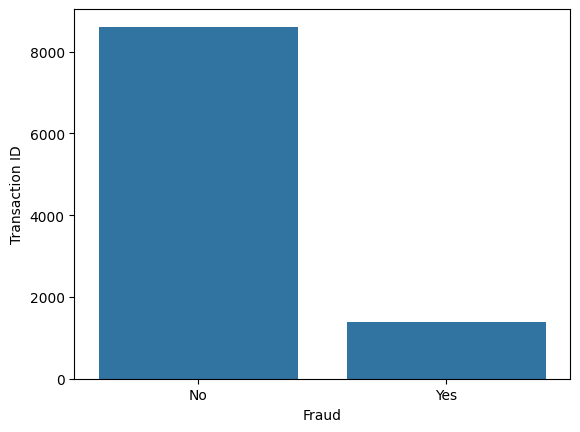

In [87]:
loc= data.groupby('Fraud')
sns.barplot(x=loc['Transaction ID'].count().index, y=loc['Transaction ID'].count())

<Axes: xlabel='Fraud', ylabel='Customer ID'>

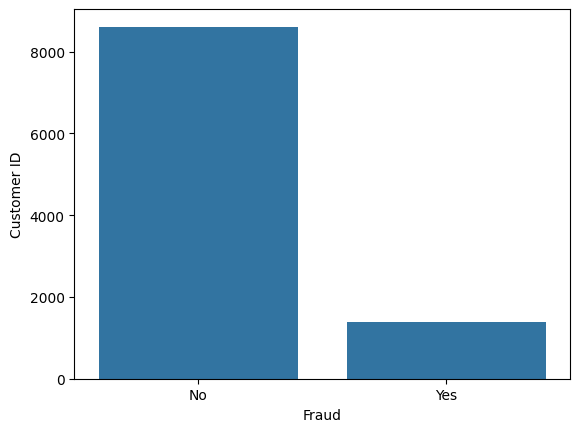

In [88]:
loc= data.groupby('Fraud')
sns.barplot(x=loc['Customer ID'].count().index, y=loc['Customer ID'].count())

<Axes: xlabel='Location', ylabel='Customer ID'>

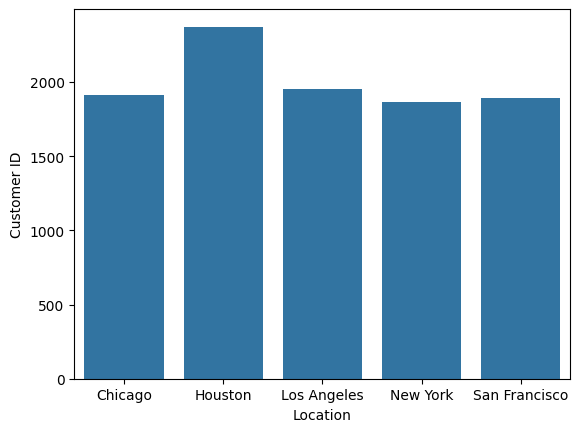

In [89]:
loc= data.groupby('Location')
sns.barplot(x=loc['Customer ID'].count().index, y=loc['Customer ID'].count())

<Axes: xlabel='Device Type', ylabel='Customer ID'>

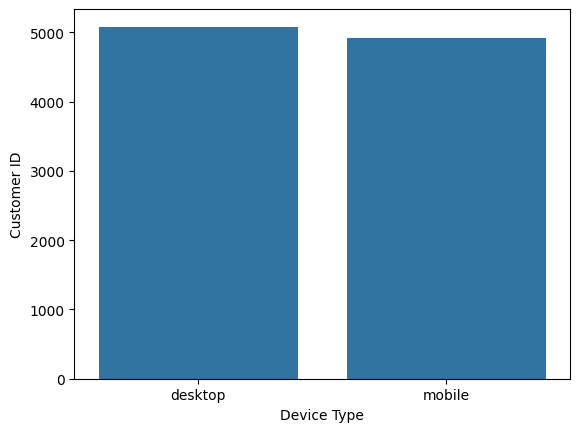

In [90]:
loc= data.groupby('Device Type')
sns.barplot(x=loc['Customer ID'].count().index, y=loc['Customer ID'].count())

<Axes: xlabel='Merchant Category', ylabel='Customer ID'>

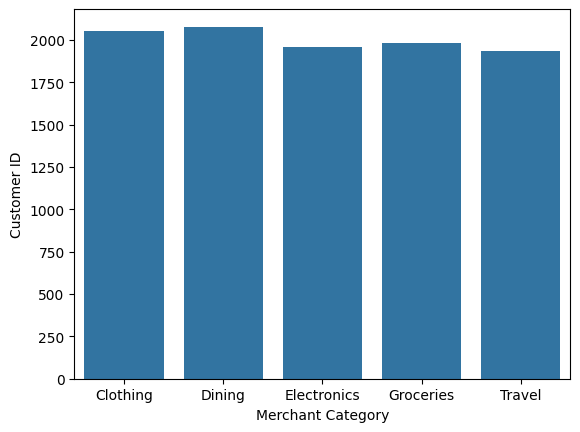

In [91]:
loc= data.groupby('Merchant Category')
sns.barplot(x=loc['Customer ID'].count().index, y=loc['Customer ID'].count())

<Axes: xlabel='Transaction Date and Time', ylabel='Customer ID'>

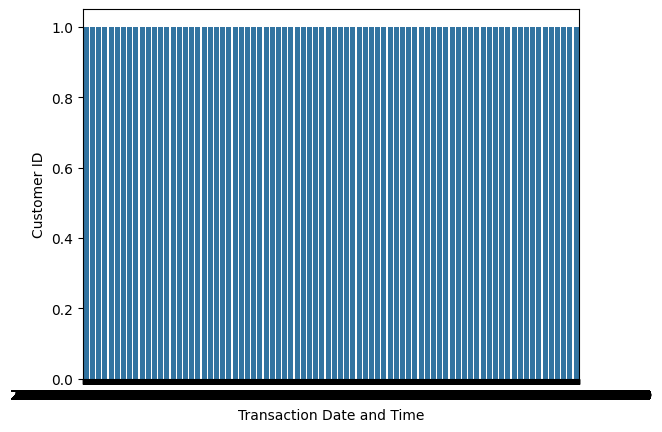

In [92]:
loc= data.groupby('Transaction Date and Time')
sns.barplot(x=loc['Customer ID'].count().index, y=loc['Customer ID'].count())

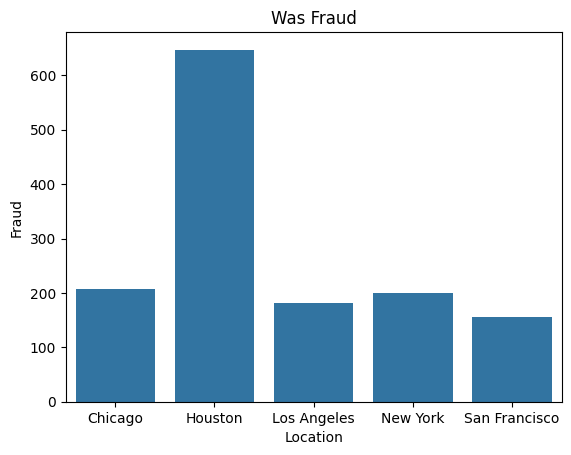

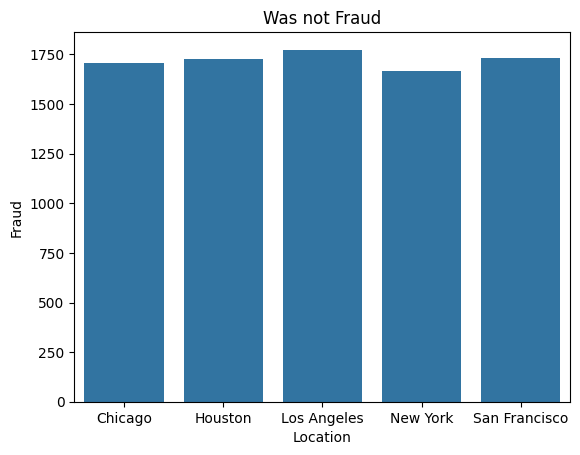

In [123]:
churn = data[data['Fraud']==1]
loc = churn.groupby('Location')
sns.barplot(x=loc['Fraud'].count().index, y=loc['Fraud'].count())
plt.title('Was Fraud')
plt.show()

noChurn = data[data['Fraud']==0]
loc = noChurn.groupby('Location')
sns.barplot(x=loc['Fraud'].count().index, y=loc['Fraud'].count())
plt.title('Was not Fraud')
plt.show()

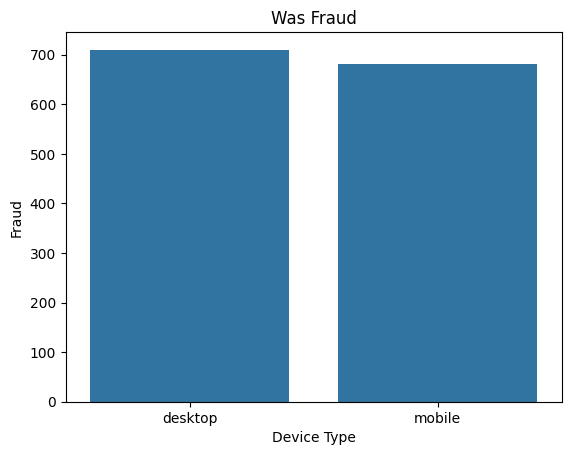

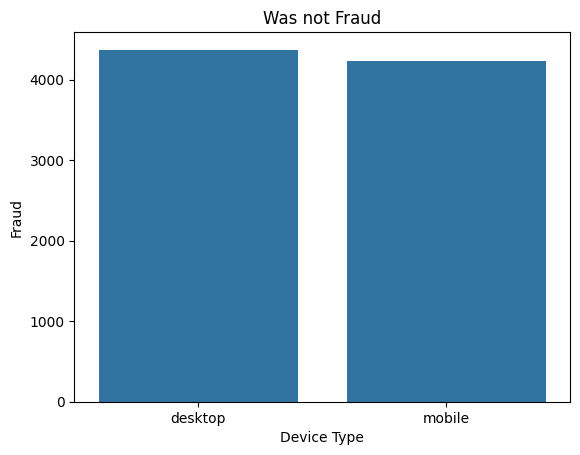

In [122]:
# 
churn = data[data['Fraud']==1]
loc = churn.groupby('Device Type')
sns.barplot(x=loc['Fraud'].count().index, y=loc['Fraud'].count())
plt.title('Was Fraud')
plt.show()

noChurn = data[data['Fraud']==0]
loc = noChurn.groupby('Device Type')
sns.barplot(x=loc['Fraud'].count().index, y=loc['Fraud'].count())
plt.title('Was not Fraud')
plt.show()

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction ID               10000 non-null  int64  
 1   Customer ID                  10000 non-null  int64  
 2   Transaction Amount           10000 non-null  float64
 3   Transaction Date and Time    10000 non-null  object 
 4   Merchant Category            10000 non-null  object 
 5   Location                     10000 non-null  object 
 6   Previous Transaction Amount  10000 non-null  float64
 7   Time Since Last Transaction  10000 non-null  float64
 8   Device Type                  10000 non-null  object 
 9   Fraud                        10000 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 781.4+ KB


C:\Users\etiem\AppData\Local\Temp\ipykernel_7368\533060855.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Fraud', y='Transaction Amount', palette='coolwarm')


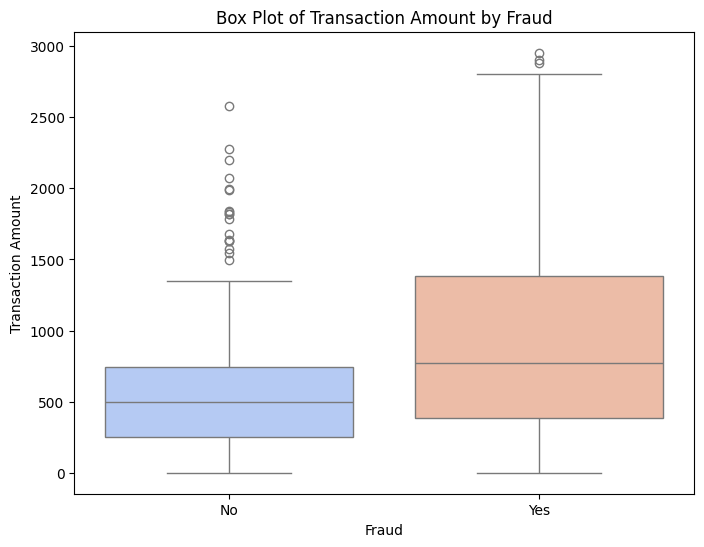

C:\Users\etiem\AppData\Local\Temp\ipykernel_7368\533060855.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Fraud', y='Previous Transaction Amount', palette='coolwarm')


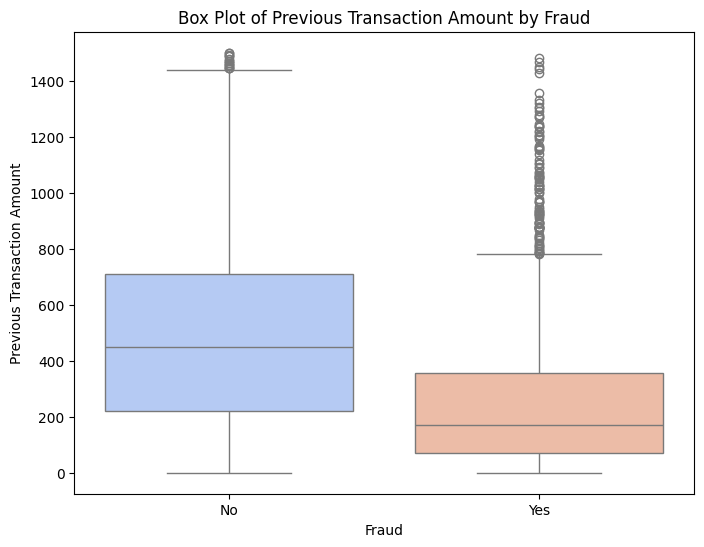

C:\Users\etiem\AppData\Local\Temp\ipykernel_7368\533060855.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Fraud', y='Time Since Last Transaction', palette='coolwarm')


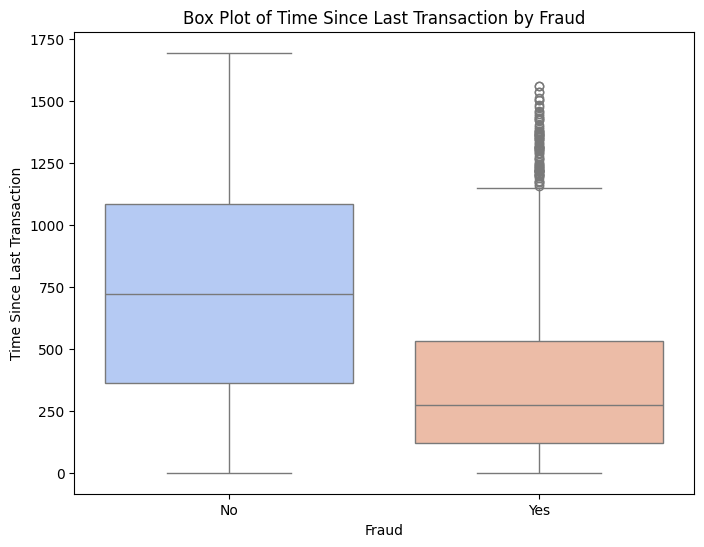

In [96]:
# Box plot for Transaction Amount by Fraud
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Fraud', y='Transaction Amount', palette='coolwarm')
plt.title('Box Plot of Transaction Amount by Fraud')
plt.show()

# Box plot for Previous Transaction Amount by Fraud
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Fraud', y='Previous Transaction Amount', palette='coolwarm')
plt.title('Box Plot of Previous Transaction Amount by Fraud')
plt.show()

# Box plot for Time Since Last Transaction by Fraud
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Fraud', y='Time Since Last Transaction', palette='coolwarm')
plt.title('Box Plot of Time Since Last Transaction by Fraud')
plt.show()


# Feature Engineering

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction ID               10000 non-null  int64  
 1   Customer ID                  10000 non-null  int64  
 2   Transaction Amount           10000 non-null  float64
 3   Transaction Date and Time    10000 non-null  object 
 4   Merchant Category            10000 non-null  object 
 5   Location                     10000 non-null  object 
 6   Previous Transaction Amount  10000 non-null  float64
 7   Time Since Last Transaction  10000 non-null  float64
 8   Device Type                  10000 non-null  object 
 9   Fraud                        10000 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 781.4+ KB


In [98]:
# Convert Transaction Date and Time to datetime
data['Transaction Date and Time'] = pd.to_datetime(data['Transaction Date and Time'])

# Create day of week feature
data['day_of_week'] = data['Transaction Date and Time'].dt.dayofweek

In [99]:
# Create time of day feature
data['hour_of_day'] = data['Transaction Date and Time'].dt.hour
data['time_of_day'] = pd.cut(data['hour_of_day'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'], right=False)

In [100]:
# Create transaction amount change feature
data['transaction_amount_change'] = data['Transaction Amount'] - data['Previous Transaction Amount']

In [101]:
data.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date and Time,Merchant Category,Location,Previous Transaction Amount,Time Since Last Transaction,Device Type,Fraud,day_of_week,hour_of_day,time_of_day,transaction_amount_change
0,1,4174,659.297095,2023-01-01 00:00:00,Clothing,Los Angeles,579.323704,481.377516,desktop,No,6,0,Night,79.973391
1,2,4507,474.046452,2023-01-01 00:01:00,Dining,Houston,407.220271,1159.211075,desktop,No,6,0,Night,66.826182
2,3,1860,498.819570,2023-01-01 00:02:00,Dining,San Francisco,265.583605,720.677284,desktop,No,6,0,Night,233.235965
3,4,2294,744.199592,2023-01-01 00:03:00,Electronics,Los Angeles,1097.259081,1.000000,mobile,No,6,0,Night,-353.059489
4,5,2130,279.181247,2023-01-01 00:04:00,Electronics,Los Angeles,238.389682,1378.958721,mobile,No,6,0,Night,40.791565


C:\Users\etiem\AppData\Local\Temp\ipykernel_7368\3602483969.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Fraud', y='day_of_week', palette='coolwarm')


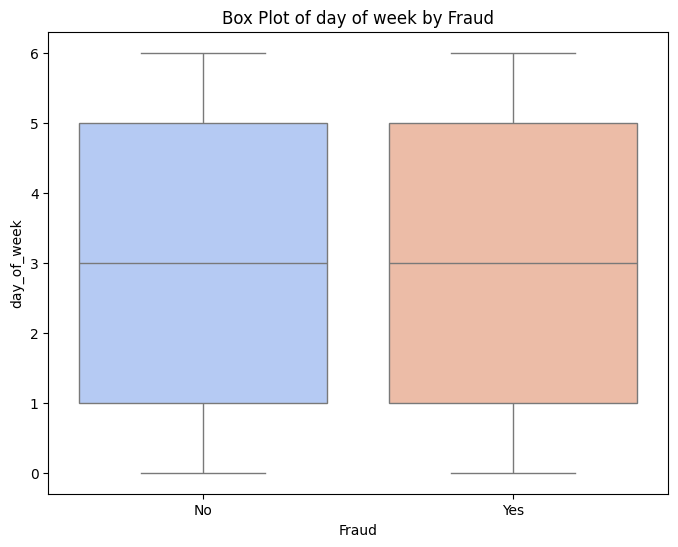

In [102]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Fraud', y='day_of_week', palette='coolwarm')
plt.title('Box Plot of day of week by Fraud')
plt.show()

C:\Users\etiem\AppData\Local\Temp\ipykernel_7368\487514692.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Fraud', y='transaction_amount_change', palette='coolwarm')


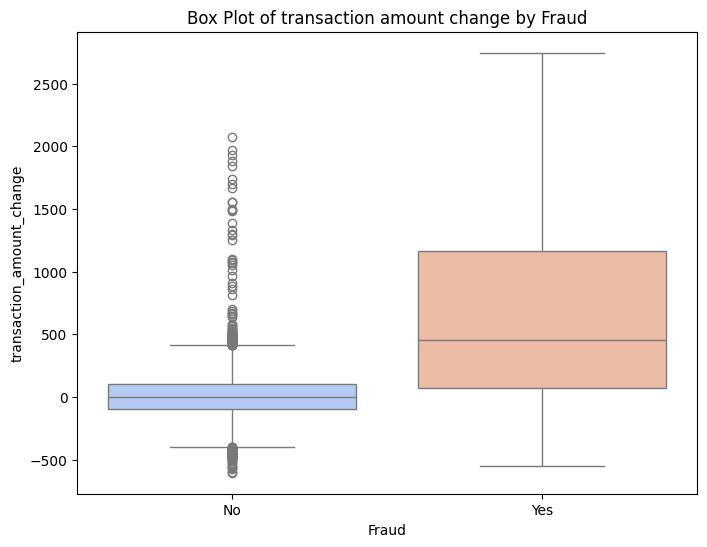

In [103]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Fraud', y='transaction_amount_change', palette='coolwarm')
plt.title('Box Plot of transaction amount change by Fraud')
plt.show()

C:\Users\etiem\AppData\Local\Temp\ipykernel_7368\469528598.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Fraud', y='hour_of_day', palette='coolwarm')


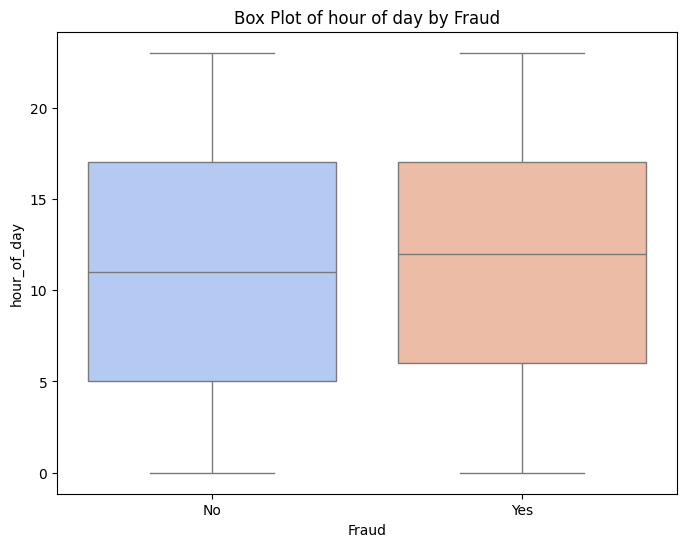

In [104]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Fraud', y='hour_of_day', palette='coolwarm')
plt.title('Box Plot of hour of day by Fraud')
plt.show()

# Modelling

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Transaction ID               10000 non-null  int64         
 1   Customer ID                  10000 non-null  int64         
 2   Transaction Amount           10000 non-null  float64       
 3   Transaction Date and Time    10000 non-null  datetime64[ns]
 4   Merchant Category            10000 non-null  object        
 5   Location                     10000 non-null  object        
 6   Previous Transaction Amount  10000 non-null  float64       
 7   Time Since Last Transaction  10000 non-null  float64       
 8   Device Type                  10000 non-null  object        
 9   Fraud                        10000 non-null  object        
 10  day_of_week                  10000 non-null  int32         
 11  hour_of_day                  10000 non-nul

In [106]:
# Convert 'Fraud' column to binary
data['Fraud'] = data['Fraud'].map({'No': 0, 'Yes': 1})

In [107]:
# Define features and target
catFeatures = ['time_of_day'] 
numFeatures = ['Transaction Amount', 'Previous Transaction Amount', 'Time Since Last Transaction', 'day_of_week', 'hour_of_day', 'transaction_amount_change']
target = 'Fraud'

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data[catFeatures + numFeatures], data[target], test_size=0.3, random_state=42)

# Build transformers for the pipeline
catTransformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])
numTransformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Build preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('cat', catTransformer, catFeatures),
    ('num', numTransformer, numFeatures)
])

In [108]:
logreg = Pipeline(steps = [('preprocessor', preprocessor), ('logistic', LogisticRegression())])

# fit model
logreg.fit(X_train, y_train)
# predictions
pred = logreg.predict(X_test)

# performance metrics (binary)
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, pred, average='binary')
print("Precision:", precision)
recall = recall_score(y_test, pred, average='binary')
print("Recall Score:", recall)
f1 = f1_score(y_test, pred, average='binary')
print("F1 Score:", f1)

# cross validation
crossVal = cross_val_score(logreg, X_train, y_train, cv=10, scoring='f1')

# print scores
print("Cross Validation F1 Scores:", crossVal)
print("Mean cross validation F1 Score:", np.mean(crossVal))


Accuracy: 0.9236666666666666
Precision: 0.934010152284264
Recall Score: 0.46
F1 Score: 0.6164154103852596
Cross Validation F1 Scores: [0.67114094 0.59722222 0.5890411  0.66666667 0.66225166 0.65789474
 0.6013986  0.6122449  0.66225166 0.67515924]
Mean cross validation F1 Score: 0.6395271707503574


In [109]:
# KNN Modelling
knn = Pipeline(steps = [('preprocessor', preprocessor), ('knn', KNeighborsClassifier())])

# fit model
knn.fit(X_train, y_train)
# predictions
pred = knn.predict(X_test)
# performance metrics (binary)
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, pred, average='binary')
print("Precision:", precision)
recall = recall_score(y_test, pred, average='binary')
print("Recall Score:", recall)
f1 = f1_score(y_test, pred, average='binary')
print("F1 Score:", f1)

# cross validation
crossVal = cross_val_score(knn, X_train, y_train, cv=10, scoring='f1')

# print scores
print("Cross Validation F1 Scores:", crossVal)
print("Mean cross validation F1 Score:", np.mean(crossVal))


Accuracy: 0.9283333333333333
Precision: 0.8870292887029289
Recall Score: 0.53
F1 Score: 0.6635367762128326
Cross Validation F1 Scores: [0.70512821 0.64473684 0.65838509 0.7037037  0.70807453 0.71604938
 0.64102564 0.65806452 0.69512195 0.6875    ]
Mean cross validation F1 Score: 0.6817789869356601


In [110]:
# Navies Bayes Model
nb = Pipeline(steps = [('preprocessor', preprocessor), ('nb', GaussianNB())])
# fit
nb.fit(X_train, y_train)
# predict
pred = nb.predict(X_test)


# performance metrics (binary)
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, pred, average='binary')
print("Precision:", precision)
recall = recall_score(y_test, pred, average='binary')
print("Recall Score:", recall)
f1 = f1_score(y_test, pred, average='binary')
print("F1 Score:", f1)


# cross validation
crossVal = cross_val_score(nb, X_train, y_train, cv=10, scoring='f1')

# print scores
print("Cross Validation F1 Scores:", crossVal)
print("Mean cross validation F1 Score:", np.mean(crossVal))

Accuracy: 0.9216666666666666
Precision: 0.880184331797235
Recall Score: 0.4775
F1 Score: 0.6191247974068071
Cross Validation F1 Scores: [0.69281046 0.60810811 0.5974026  0.65806452 0.67948718 0.64968153
 0.62666667 0.60130719 0.68789809 0.68292683]
Mean cross validation F1 Score: 0.6484353161955095


In [111]:
# Create the KNN model
knn = KNeighborsClassifier()

In [112]:
# build our pipeline
pipeline = Pipeline(steps=
                    [
                        ('preprocessor',preprocessor),
                        ('classifier',KNeighborsClassifier())
                    ])

In [113]:
# use GRID SEARCH to find the best combination of hyperparameters for our problem
param_grid = {
    'classifier__n_neighbors':[5,7,9,15,35,45,55],
    'classifier__weights':['uniform','distance'],
    'classifier__metric':['euclidean','manhattan','minkowski']
}

In [114]:
# let's perform gridsearch
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=1, scoring='f1')
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['time_of_day']),
                                                                        ('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['Transaction '
                                                                          'Amount',
                                                                          'Previous '
                                                                          'Transaction '
                                                                          'Amount',
                                                                          'Time '
                                                                          'Since '
                                                                          'Last '
                                                                          'Transaction',
                                                                          'day_of_week',
                                                                          'hour_of_day',
                                                                          'transaction_amount_change'])])),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__metric': ['euclidean', 'manhattan',
                                                'minkowski'],
                         'classifier__n_neighbors': [5, 7, 9, 15, 35, 45, 55],
                         'classifier__weights': ['uniform', 'distance']},
             scoring='f1', verbose=1)

In [115]:
# Define the parameter grid
param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan']
}

In [116]:
# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)
# Train the model with GridSearchCV
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['time_of_day']),
                                                                        ('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['Transaction '
                                                                          'Amount',
                                                                          'Previous '
                                                                          'Transaction '
                                                                          'Amount',
                                                                          'Time '
                                                                          'Since '
                                                                          'Last '
                                                                          'Transaction',
                                                                          'day_of_week',
                                                                          'hour_of_day',
                                                                          'transaction_amount_change'])])),
                                       ('classifier', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__metric': ['euclidean', 'manhattan'],
                         'classifier__n_neighbors': [3, 5, 7, 9, 11, 13, 15],
                         'classifier__weights': ['uniform', 'distance']},
             scoring='f1')

In [117]:
final_classifier = KNeighborsClassifier(n_neighbors=grid_search.best_params_['classifier__n_neighbors'],
                                        metric = grid_search.best_params_['classifier__metric'],
                                        weights = grid_search.best_params_['classifier__weights']
                                        )

In [118]:
final_pipeline = Pipeline(steps=
                          [
                              ('preprocessor',preprocessor),
                              ('classifier',final_classifier)
                          ])

In [119]:
final_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['time_of_day']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Transaction Amount',
                                                   'Previous Transaction '
                                                   'Amount',
                                                   'Time Since Last '
                                                   'Transaction',
                                                   'day_of_week', 'hour_of_day',
                                                   'transaction_amount_change'])])),
                ('classifier',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=7,
                                      weights='distance'))])

In [120]:
# Make predictions on the test set
y_pred = final_pipeline.predict(X_test)

In [121]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9316666666666666
Precision: 0.9045643153526971
Recall: 0.545
F1 Score: 0.6801872074882995
Confusion Matrix:
 [[2577   23]
 [ 182  218]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      2600
           1       0.90      0.55      0.68       400

    accuracy                           0.93      3000
   macro avg       0.92      0.77      0.82      3000
weighted avg       0.93      0.93      0.92      3000

